In [1]:
# !kaggle competitions download -c nlp-getting-started

In [2]:
# from zipfile import ZipFile

In [3]:
# with ZipFile('./nlp-getting-started.zip', 'r') as zipObj:
#     zipObj.extractall()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv('./train.csv')
train_df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train_df.shape

(7613, 5)

In [8]:
train_df['keyword'].nunique(), train_df['location'].nunique()

(221, 3341)

In [9]:
# Comments about disaster
for com in train_df.query('target == 1')['text'].head(5):
    print(com)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


In [10]:
# Comments not about disaster
for com in train_df.query('target == 0')['text'].head(5):
    print(com)

What's up man?
I love fruits
Summer is lovely
My car is so fast
What a goooooooaaaaaal!!!!!!


In [11]:
test_df = pd.read_csv('./test.csv')
test_df.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [12]:
test_df.shape

(3263, 4)

In [13]:
test_id = test_df['id']

In [14]:
df = train_df.append(test_df).reset_index()
df.shape

(10876, 6)

In [15]:
df['keyword'].fillna('Unknown', inplace=True)
df['location'].fillna('Unknown', inplace=True)

In [16]:
df

index     id  keyword location  \
0          0      1  Unknown  Unknown   
1          1      4  Unknown  Unknown   
2          2      5  Unknown  Unknown   
3          3      6  Unknown  Unknown   
4          4      7  Unknown  Unknown   
...      ...    ...      ...      ...   
10871   3258  10861  Unknown  Unknown   
10872   3259  10865  Unknown  Unknown   
10873   3260  10868  Unknown  Unknown   
10874   3261  10874  Unknown  Unknown   
10875   3262  10875  Unknown  Unknown   

                                                    text  target  
0      Our Deeds are the Reason of this #earthquake M...     1.0  
1                 Forest fire near La Ronge Sask. Canada     1.0  
2      All residents asked to 'shelter in place' are ...     1.0  
3      13,000 people receive #wildfires evacuation or...     1.0  
4      Just got sent this photo from Ruby #Alaska as ...     1.0  
...                                                  ...     ...  
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...     NaN  
10872  Storm in RI worse than last hurricane. My city...     NaN  
10873  Green Line derailment in Chicago http://t.co/U...     NaN  
10874  MEG issues Hazardous Weather Outlook (HWO) htt...     NaN  
10875  #CityofCalgary has activated its Municipal Eme...     NaN  

[10876 rows x 6 columns]

In [17]:
df.isna().sum()

index          0
id             0
keyword        0
location       0
text           0
target      3263
dtype: int64

# EDA

Text(0.5, 1.0, 'Distribution of text length')

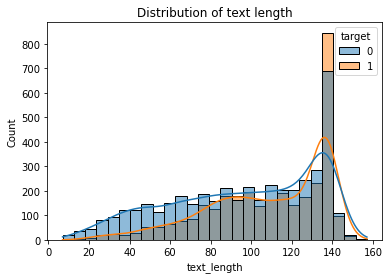

In [18]:
temp_df = train_df.copy()
temp_df['text_length'] = train_df['text'].apply(lambda x: len(x))
sns.histplot(data=temp_df, x='text_length', hue='target', kde=True)
plt.title('Distribution of text length')

<AxesSubplot:title={'center':'Count plot of target'}, xlabel='target', ylabel='count'>

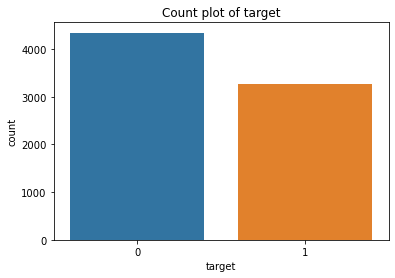

In [19]:
plt.title('Count plot of target')
sns.countplot(data=train_df, x='target')

Text(0.5, 1.0, 'Keyword number')

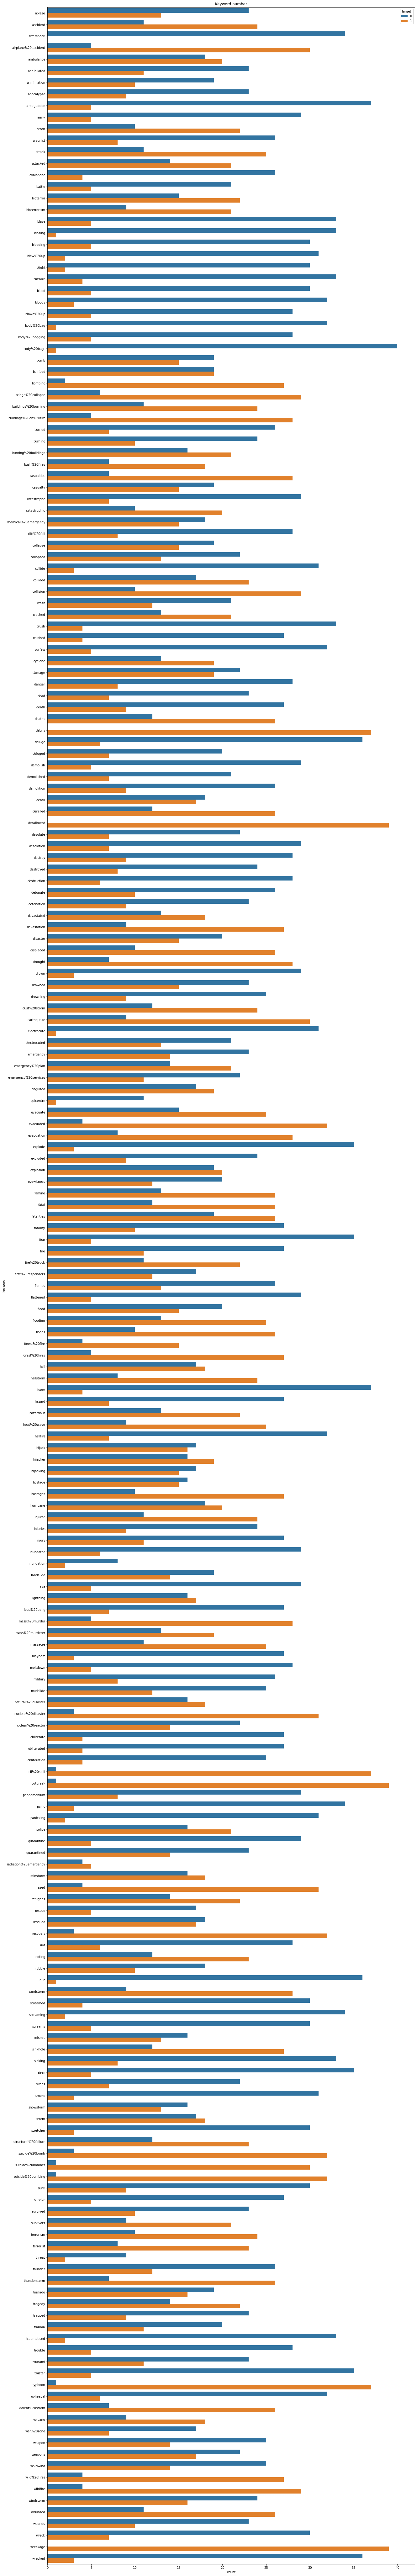

In [20]:
plt.figure(figsize=(21,150))
sns.countplot(data=train_df, y='keyword', hue='target')
plt.title('Keyword number')

In [21]:
train_df['keyword'] = train_df['keyword'].astype('category')
train_df['location'] = train_df['location'].astype('category')

In [22]:
train_df['location'] = train_df['location'].apply(lambda x: x.replace('$$', ''))

In [23]:
plt.figure(figsize=(21,800))
sns.countplot(data=train_df, y='location', hue='target')

<AxesSubplot:xlabel='count', ylabel='location'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  f

# Data preprocessing

In [176]:
import re
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
import spacy
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [26]:
len(STOPWORDS)

337

In [225]:
def preprocess_text(text, stem=False):
    text = text.lower()
    # delete special characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    # delete links
    text = re.sub(r'http\S+', '', text)
    # delete multispaces
    text = re.sub('\s\s+', ' ', text)
    # delete digits
    text = re.sub(r'[0-9]+', '', text)
    # delete stop words
    text = text.split(' ')
    text = ' '.join([word for word in text if not word in STOPWORDS])
    text = remove_stopwords(text)
    if stem:
        stem = SnowballStemmer(language='english')
        text = ' '.join([stem.stem(word) for word in text.split(' ')])
    else:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
    text = text.strip()
    return text

In [224]:
def tokenize_word(text, stem=True):
    text = text.lower()
    # delete special characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    # delete links
    text = re.sub(r'http\S+', '', text)
    # delete multispaces
    text = re.sub('\s\s+', ' ', text)
    # delete digits
    text = re.sub(r'[0-9]+', '', text)
    # delete stop words
    text = text.split(' ')
    text = ' '.join([word for word in text if not word in STOPWORDS])
    text = remove_stopwords(text)
    if stem:
        stem = SnowballStemmer(language='english')
        text = ' '.join([stem.stem(word) for word in text.split(' ')])
    else:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
    text = text.strip()
    return text.split(' ')

In [186]:
preprocess_text(df['text'][0], stem=True)

'deed reason earthquak allah forgiv'

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [232]:
cv_vectorizer = CountVectorizer(preprocessor=preprocess_text)
cv_vectorizer.fit(df['text'])
print(len(cv_vectorizer.vocabulary_))

X = vectorizer.transform(df['text'])
X_test = X[7613:]
X = X[:7613]
Y = df['target'].values[:7613]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)
X_train, X_val, Y_train, Y_val = X_train.astype(np.float32), X_val.astype(np.float32), Y_train.astype(np.float32), Y_val.astype(np.float32)

X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

19603


((5709, 27922), (1904, 27922), (5709,), (1904,))

In [233]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_gbc.fit(X_train, Y_train)
Y_val_gbc = model_gbc.predict(X_val)
Y_test_gbc = model_gbc.predict(X_test)

print(classification_report(Y_val, Y_val_gbc))
print(f1_score(Y_val, Y_val_gbc))

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80      1080
         1.0       0.79      0.60      0.68       824

    accuracy                           0.76      1904
   macro avg       0.77      0.74      0.74      1904
weighted avg       0.76      0.76      0.75      1904

0.6822880771881461


In [234]:
model_lr = LogisticRegression(random_state=42, max_iter=10000)
model_lr.fit(X_train, Y_train)
Y_val_lr = model_lr.predict(X_val)
Y_test_lr = model_lr.predict(X_test)

print(classification_report(Y_val, Y_val_lr))
print(f1_score(Y_val, Y_val_lr))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      1080
         1.0       0.78      0.72      0.75       824

    accuracy                           0.79      1904
   macro avg       0.79      0.79      0.79      1904
weighted avg       0.79      0.79      0.79      1904

0.7517372078332281


In [229]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess_text)
tfidf_vectorizer.fit(df['text'])
print(len(tfidf_vectorizer.vocabulary_))

X = tfidf_vectorizer.transform(df['text'])
X_test = X[7613:]
X = X[:7613]
Y = df['target'].values[:7613]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)
X_train, X_val, Y_train, Y_val = X_train.astype(np.float32), X_val.astype(np.float32), Y_train.astype(np.float32), Y_val.astype(np.float32)

X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

19603


((5709, 19603), (1904, 19603), (5709,), (1904,))

In [230]:
model_gbc_tfidf = GradientBoostingClassifier(random_state=42)
model_gbc_tfidf.fit(X_train, Y_train)
Y_val_gbc_tfidf = model_gbc_tfidf.predict(X_val)
Y_test_gbc_tfidf = model_gbc_tfidf.predict(X_test)

print(classification_report(Y_val, Y_val_gbc_tfidf))
print(f1_score(Y_val, Y_val_gbc_tfidf))

              precision    recall  f1-score   support

         0.0       0.70      0.96      0.81      1108
         1.0       0.90      0.43      0.58       796

    accuracy                           0.74      1904
   macro avg       0.80      0.70      0.70      1904
weighted avg       0.78      0.74      0.72      1904

0.5811384876805438


In [231]:
model_lr_tfidf = LogisticRegression(random_state=42, max_iter=10000)
model_lr_tfidf.fit(X_train, Y_train)
Y_val_lr_tfidf = model_lr_tfidf.predict(X_val)
Y_test_lr_tfidf = model_lr_tfidf.predict(X_test)

print(classification_report(Y_val, Y_val_lr_tfidf))
print(f1_score(Y_val, Y_val_lr_tfidf))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      1108
         1.0       0.88      0.62      0.73       796

    accuracy                           0.81      1904
   macro avg       0.83      0.78      0.79      1904
weighted avg       0.82      0.81      0.80      1904

0.7288758265980896


In [150]:
solution = pd.DataFrame({'id': test_id, 'target': Y_test_lr.astype(np.int32)})
solution.to_csv('submission.csv', sep=',', index=False)